# MNIST Auto-Encoder

## Pre-requisites

In [1]:
try:
    from cloudmesh.common.StopWatch import StopWatch
except:  # noqa: E722
    ! pip install cloudmesh-common
    from cloudmesh.common.StopWatch import StopWatch

## Import Libraries

In [2]:
StopWatch.start("total")
StopWatch.start("import")
import tensorflow as tf
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.datasets import mnist
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
StopWatch.stop("import")
StopWatch.progress(0)

# cloudmesh status=running progress=0 pid=3080


## Pre-Process Data

In [3]:
StopWatch.start("data-load")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
StopWatch.stop("data-load")
StopWatch.progress(20)

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
latent_dim = 16
hidden_units = [32, 64]

# cloudmesh status=running progress=20 pid=3080


## Define Model

In [4]:
StopWatch.start("define-model")
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
x = Dense(hidden_units[0], activation='relu')(x)
x = Dense(hidden_units[1], activation='relu')(x)

shape = K.int_shape(x)

# generate latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# instantiate encoder model
encoder = Model(inputs,
                latent,
                name='encoder')
encoder.summary()
plot_model(encoder,
           to_file='encoder.png',
           show_shapes=True)


latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = Dense(hidden_units[0], activation='relu')(x)
x = Dense(hidden_units[1], activation='relu')(x)

outputs = Dense(1, activation='relu')(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='decoder.png', show_shapes=True)

autoencoder = Model(inputs,
                    decoder(encoder(inputs)),
                    name='autoencoder')
autoencoder.summary()
plot_model(autoencoder,
           to_file='autoencoder.png',
           show_shapes=True)
StopWatch.start('compile')
autoencoder.compile(loss='mse', optimizer='adam')
StopWatch.stop('compile')
StopWatch.stop("define-model")
StopWatch.progress(40)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 dense (Dense)               (None, 28, 28, 32)        64        
                                                                 
 dense_1 (Dense)             (None, 28, 28, 64)        2112      
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 latent_vector (Dense)       (None, 16)                802832    
                                                                 
Total params: 805,008
Trainable params: 805,008
Non-trainable params: 0
_________________________________________________________________


2022-07-15 09:34:17.124351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 16)]              0         
                                                                 
 dense_2 (Dense)             (None, 50176)             852992    
                                                                 
 reshape (Reshape)           (None, 28, 28, 64)        0         
                                                                 
 dense_3 (Dense)             (None, 28, 28, 32)        2080      
                                                                 
 dense_4 (Dense)             (None, 28, 28, 64)        2112      
                                                                 
 dense_5 (Dense)             (None, 28, 28, 1)         65        
                                                                 
Total params: 857,249
Trainable params: 857,249
Non-trainab

## Train

In [5]:
StopWatch.start("train")
autoencoder.fit(x_train,
                x_train,
                validation_data=(x_test, x_test),
                epochs=1,
                batch_size=batch_size)
StopWatch.stop("train")
StopWatch.progress(60)

1875/1875 [==============================] - 49s 26ms/step - loss: 0.0184 - val_loss: 0.0130
# cloudmesh status=running progress=60 pid=3080


## Test

In [6]:
StopWatch.start("test")
x_decoded = autoencoder.predict(x_test)
StopWatch.stop("test")
StopWatch.progress(80)

313/313 [==============================] - 2s 7ms/step
# cloudmesh status=running progress=80 pid=3080


## Visualize

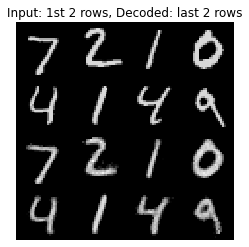

# cloudmesh status=running progress=100 pid=3080


In [7]:
StopWatch.start("visualize")
imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('input_and_decoded.png')
plt.show()
StopWatch.stop("visualize")
StopWatch.stop("total")
StopWatch.progress(100)